# CS 105 Project Phase 2

Our objective is to assess how the impeachment trial of Donald Trump has affected support of Democratic candidates and the President as he heads towards re-election. We will look at polling data from before, during, and after the impeachment trials and plot trends according to different groupings such as region (social group), age, gender, economic group, and political orientation. After analyzing this data, we will make predictions for each group and who they want to be voted into office for the 2020 election in November.

Visual requirements:

"You must include a histogram, at least two scatter plots or a pair-wise
scatter plot, a parallel coordinates plot, and a box-plot. If a plot is not applicable in your case,
then note that and include a different plot."

In [14]:
import pandas as pd

## FiveThirtyEight

National polling data of who is leading in the Democratic primary election, last updated February 29, 2020

In [15]:
primary_df = pd.read_csv("president_primary_polls.csv")
primary_df.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Sanders,13257,Bernard Sanders,34.1
1,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Warren,13258,Elizabeth Warren,14.0
2,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,14.0
3,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Bloomberg,13289,Michael Bloomberg,11.7
4,119292,64627,2020,California,1539,Point Blank Political,NaN,NaN,Point Blank Political,550.0,...,False,2/29/20 09:28,NaN,https://www.pointblankpolitical.com/2020-ca-de...,primary,DEM,Buttigieg,13345,Pete Buttigieg,8.8


In [16]:
#survivors_table = (titanic_df.
#                   groupby(["sex", "adult", "pclass"]).
#                   survived.
#                   mean())
#survivors_table.to_frame()

d_primary_table = (primary_df.groupby(["poll_id", "candidate_id", "candidate_name"]).pct.mean())
#d_primary_table.sort_values(by=['poll_id'], accending=False)
d_primary_table.to_frame()

pct
poll_id candidate_id candidate_name            
56853   13255        Sherrod Brown         1.00
        13256        Joseph R. Biden Jr.  26.00
        13257        Bernard Sanders      19.00
        13258        Elizabeth Warren      5.00
        13276        Beto O'Rourke         8.00
...                                         ...
64627   13289        Michael Bloomberg    21.95
        13310        Amy Klobuchar         3.30
        13327        Tom Steyer            2.50
        13343        Tulsi Gabbard         1.00
        13345        Pete Buttigieg        8.80

[15792 rows x 1 columns]

National polling data of who is leading in the general primary election, last updated February 29, 2020

In [17]:
general_df = pd.read_csv("president_polls.csv")
general_df.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,ranked_choice_reallocated,created_at,notes,url,stage,answer,candidate_name,candidate_party,pct
0,119270,64622,2020,South Carolina,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/28/20 18:55,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Sanders,Bernard Sanders,DEM,42.4
1,119270,64622,2020,South Carolina,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/28/20 18:55,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Trump,Donald Trump,REP,48.2
2,119271,64622,2020,South Carolina,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/28/20 18:55,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Warren,Elizabeth Warren,DEM,40.7
3,119271,64622,2020,South Carolina,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/28/20 18:55,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Trump,Donald Trump,REP,49.2
4,119272,64622,2020,South Carolina,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,...,False,False,2/28/20 18:55,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Biden,Joseph R. Biden Jr.,DEM,41.8


In [18]:
general_election = (general_df.groupby(["poll_id", "state", "candidate_name"]).pct.mean())
general_election.to_frame()

pct
poll_id state    candidate_name            
57026   Ohio     Bernard Sanders      47.00
                 Donald Trump         45.25
                 Elizabeth Warren     43.00
                 Joseph R. Biden Jr.  48.00
                 Sherrod Brown        48.00
...                                     ...
64628   Missouri Donald Trump         52.00
                 Elizabeth Warren     35.00
                 Joseph R. Biden Jr.  42.00
                 Michael Bloomberg    39.00
                 Pete Buttigieg       37.00

[1087 rows x 1 columns]

National polling data of presidental approval/disapproval rate, last updated February 27, 2020

In [7]:
approval_df = pd.read_csv("president_approval_polls.csv")
approval_df.head()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
0,119194,64608,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/25/20,2/27/20,NaN,True,2/28/20 09:27,NaN,http://www.rasmussenreports.com/public_content...,538,47.0,52.0
1,119031,64571,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/24/20,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,42.0,53.0
2,119032,64571,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/24/20,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,43.0,55.0
3,119075,64583,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/24/20,2/26/20,NaN,True,2/27/20 09:26,NaN,http://www.rasmussenreports.com/public_content...,538,52.0,47.0
4,119267,64591,2020.0,NaN,Donald Trump,590,Fox News/Beacon Research/Shaw & Co. Research,NaN,NaN,Fox News,...,2/23/20,2/26/20,NaN,NaN,2/28/20 18:00,NaN,https://www.scribd.com/document/449414637/Fox-...,538,47.0,52.0


Visualizing President Trump's current approval rating in a histogram: 

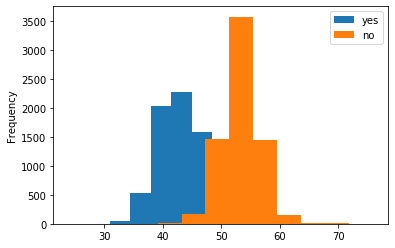

In [22]:
approval_df.yes.plot.hist(legend=True)
approval_df.no.plot.hist(legend=True)

## SurveyUSA

Data to be added below